In [1]:
!nvidia-smi

Sat Nov 25 18:41:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -q transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install -q git+https://github.com/mikegarts/diffusers.git@img2img.multiple.controlnets.pipeline

!pip install opencv-contrib-python
!pip install controlnet_aux

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.2 MB/s eta 0:00:00
  Created wheel for controlnet_aux: filename=controlnet_aux-0.0.7-py3-none-any.whl size=274341 sha256=3d057ea4f9d7c2ab0bcc623a8d7d59faecf1a3c83016d31c21a31b1798836bcb
  Stored in directory: /root/.cache/pip/wheels/1e/3e/93/6678b4c0bc2ec31d53409b25d4189cbb08bae843e8b2b78e52
Successfully built controlnet_aux


In [3]:
!mkdir -p my_pipe && cd my_pipe && wget -O pipeline.py https://raw.githubusercontent.com/huggingface/diffusers/62e7091e0f2a1bc1f767636f1a05253784860d36/examples/community/stable_diffusion_controlnet_img2img.py
!pip install ninja
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118


--2023-11-25 18:42:58--  https://raw.githubusercontent.com/huggingface/diffusers/62e7091e0f2a1bc1f767636f1a05253784860d36/examples/community/stable_diffusion_controlnet_img2img.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47377 (46K) [text/plain]
Saving to: ‘pipeline.py’

pipeline.py         100%[===================>]  46.27K  --.-KB/s    in 0.04s   

2023-11-25 18:42:58 (1.06 MB/s) - ‘pipeline.py’ saved [47377/47377]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: xformers
    Found existing installation: xformers 0.0.22.post7
    Uninstalling xformers-0.

In [4]:
import numpy as np
import torch
from PIL import Image
from diffusers import ControlNetModel, UniPCMultistepScheduler
from diffusers import DiffusionPipeline
from diffusers.utils import load_image

In [5]:
from diffusers import DiffusionPipeline
import torch
pipeline = DiffusionPipeline.from_pretrained("gouthaml/raos-virtual-try-on-model", torch_dtype=torch.float16)

pipeline.to("cuda")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [77]:
img = pipeline("an image about only short sleeve cotton poplin blouse featuring a floral pattern printed in shades of green, focusing solely on the garment").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

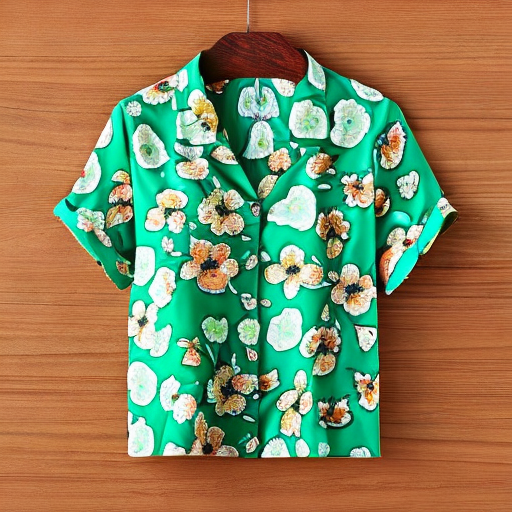

In [78]:
img

In [45]:
import cv2
from PIL import Image

In [46]:
!git lfs install
!git clone https://huggingface.co/spaces/wildoctopus/cloth-segmentation


Updated git hooks.
Git LFS initialized.
Cloning into 'cloth-segmentation'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 46 (delta 1), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (46/46), 1.96 MiB | 2.16 MiB/s, done.


In [11]:
%cd /content/cloth-segmentation

/content/cloth-segmentation


In [13]:
import PIL
import torch
import os
from process import load_seg_model, get_palette, generate_mask



device = 'cpu'

def read_content(file_path: str) -> str:

    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    return content

def initialize_and_load_models():

    checkpoint_path = 'model/cloth_segm.pth'
    net = load_seg_model(checkpoint_path, device=device)

    return net

net = initialize_and_load_models()
palette = get_palette(4)


def run(img):

    cloth_seg = generate_mask(img, net=net, palette=palette, device=device)
    return cloth_seg

Model already exists.
----checkpoints loaded from path: model/cloth_segm.pth----


In [79]:
img = Image.open('/content/download (2).png').convert('RGB')
cloth = run(img)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [80]:
def create_white_background_image(img, mask_path):
    original = img

    white_bg_img = Image.new("RGB", original.size, (255, 255, 255))

    mask = mask_path.convert("L")

    original_pixels = original.load()
    mask_pixels = mask.load()
    white_bg_pixels = white_bg_img.load()

    for y in range(original.size[1]):
        for x in range(original.size[0]):
            if mask_pixels[x, y] != 0:
                white_bg_pixels[x, y] = original_pixels[x, y]

    return white_bg_img

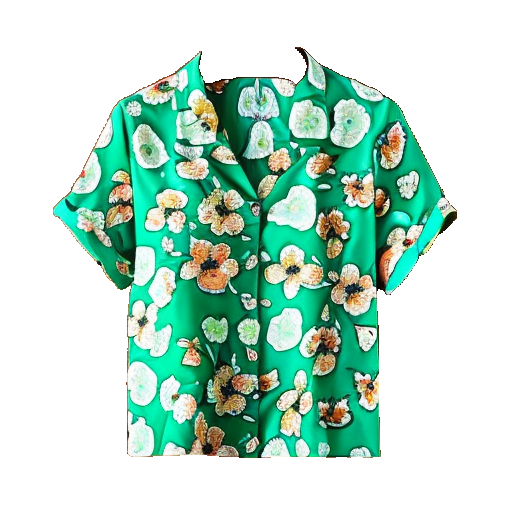

In [81]:
create_white_background_image(img, cloth)